In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [5]:
train_data = '/content/drive/MyDrive/AI_cuoiky/kitu/train'
test_data =  '/content/drive/MyDrive/AI_cuoiky/kitu/test'
val_data  =  '/content/drive/MyDrive/AI_cuoiky/kitu/test'

In [6]:
from keras.engine.data_adapter import train_validation_split

In [7]:
data_scale = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,target_size=(20, 60),batch_size=32,class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,target_size=(20, 60),batch_size=32,class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,target_size=(20, 60),batch_size=32,class_mode="categorical")

Found 256 images belonging to 32 classes.
Found 128 images belonging to 32 classes.
Found 128 images belonging to 32 classes.


In [9]:
train_input.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'K': 18,
 'L': 19,
 'M': 20,
 'N': 21,
 'P': 22,
 'Q': 23,
 'R': 24,
 'S': 25,
 'T': 26,
 'U': 27,
 'V': 28,
 'X': 29,
 'Y': 30,
 'Z': 31}

In [12]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(20,60,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32,activation='softmax'))  
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 20, 60, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 10, 30, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 30, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 15, 64)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 15, 64)        

In [14]:
from tensorflow.keras.optimizers import Adam

In [15]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
money_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

8/8 [==============================] - 1s 105ms/step - loss: 0.6040 - accuracy: 0.7695 - val_loss: 0.2809 - val_accuracy: 0.8984
Epoch 52/100
8/8 [==============================] - 1s 104ms/step - loss: 0.7072 - accuracy: 0.7461 - val_loss: 0.2521 - val_accuracy: 0.9141
Epoch 53/100
8/8 [==============================] - 1s 99ms/step - loss: 0.6770 - accuracy: 0.7383 - val_loss: 0.2713 - val_accuracy: 0.8828
Epoch 54/100
8/8 [==============================] - 1s 107ms/step - loss: 0.5959 - accuracy: 0.7969 - val_loss: 0.2421 - val_accuracy: 0.9297
Epoch 55/100
8/8 [==============================] - 1s 97ms/step - loss: 0.5886 - accuracy: 0.7812 - val_loss: 0.2023 - val_accuracy: 0.9453
Epoch 56/100
8/8 [==============================] - 1s 101ms/step - loss: 0.5678 - accuracy: 0.7773 - val_loss: 0.2230 - val_accuracy: 0.9453
Epoch 57/100
8/8 [==============================] - 1s 168ms/step - loss: 0.4944 - accuracy: 0.8203 - val_loss: 0.1970 - val_accuracy: 0.9531
Epoch 58/100
8/8 [===

In [17]:
model.save('/content/drive/MyDrive/AI_cuoiky/kitu/model_train.h5')

array([11])

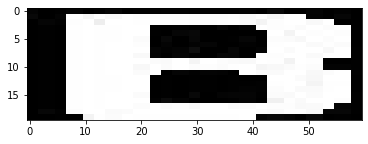

In [19]:
pic = image.load_img('/content/drive/MyDrive/AI_cuoiky/kitu/B.jpg',target_size=(20,60)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,20,60,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [20]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("0")
if guess[0]==1:
  print("1")
if guess[0]==2:
  print("2")
if guess[0]==3:
  print("3")
if guess[0]==4:
  print("4")
if guess[0]==5:
  print("5")
if guess[0]==6:
  print("6")
if guess[0]==7:
  print("7")
if guess[0]==8:
  print("8")
if guess[0]==9:
  print("9")
if guess[0]==10:
  print("A")
if guess[0]==11:
  print("B")
if guess[0]==12:
  print("C")
if guess[0]==13:
  print("D")
if guess[0]==14:
  print("E")
if guess[0]==15:
  print("F")
if guess[0]==16:
  print("G")
if guess[0]==17:
  print("H")
if guess[0]==18:
  print("K")
if guess[0]==19:
  print("L")
if guess[0]==20:
  print("M")
if guess[0]==21:
  print("N")
if guess[0]==22:
  print("P")
if guess[0]==23:
  print("Q")
if guess[0]==24:
  print("R")
if guess[0]==25:
  print("S")
if guess[0]==26:
  print("T")
if guess[0]==27:
  print("U")
if guess[0]==28:
  print("V")
if guess[0]==29:
  print("X")
if guess[0]==30:
  print("Y")
if guess[0]==31:
  print("Z")

B
